<h1 style="text-align:center">Fourier Analysis</h1>
<h3 style="text-align:center"> MCHE 485: Mechanical Vibrations</h3> 
<p style="text-align:center">Dr. Joshua Vaughan <br>
<a href="mailto:joshua.vaughan@louisiana.edu">joshua.vaughan@louisiana.edu</a><br>
http://www.ucs.louisiana.edu/~jev9637/   </p>

This notebook will look at the Fourier Analysis of periodic functions. The exact function is compared to an N-term approximation. Then, the response to the exact and approximate inputs will be compared.

We can write any periodic function as an infinite sum of sines and cosines:

$ \quad f(t) = \sum_{n=0}^{\infty}a_n\cos(n\omega_0t) + \sum_{n=1}^{\infty}b_n\sin(n\omega_0t) $

where

$ \quad a_n = \frac{\omega_0}{\pi}\int_0^{\frac{2\pi}{\omega_0}}f(t)\cos(n\omega_0t)dt $, 

$ \quad b_n = \frac{\omega_0}{\pi}\int_0^{\frac{2\pi}{\omega_0}}f(t)\sin(n\omega_0t)dt $, 

and

$ \quad a_0 = \frac{\omega_0}{2\pi}\int_0^{\frac{2\pi}{\omega_0}}f(t)dt $

For more information on this process, you can see the lectures at the [class website](http://www.ucs.louisiana.edu/~jev9637/MCHE485.html). In the code below, we'll solve the required integrals numerically.

By changing the number of terms we use to approximate the original function we can approach its shape, as shown in Figure 1.
<p style="text-align:center">
	<img src="http://shared.crawlab.org/SquareWave_Fourier_Approx.gif" alt="Fourier Analysis" width=50%/></a><br>
    <strong> Figure 1: Increasing the Number of Terms in the Approximation </strong>
</p>

In [1]:
import numpy as np              # Grab all of the NumPy functions with nickname np

In [2]:
# We want our plots to be displayed inline, not in a separate window
%matplotlib inline 

# Import the plotting functions 
import matplotlib.pyplot as plt

## *Aside*: Defining Piecewise Functions
One way that we can define piecewise functions is by using NumPy to compare a time vector to a quantity, then multiplying the boolean result by the function over the given range. For example...

In [3]:
t = np.linspace(0, 5, 11) # Definte a time vector (very rough spacing for this example)

print('Time time vector is {}.\n'.format(t))


# Now, compare evaluate each element to see which are greater than 2.0
# You can see that the result is an array of booleans, true or false.
test = t > 2.0
print('The boolean result of t > 2.0 is {}.\n'.format(test))



# If we multiply this boolean array by a numeric array, the "True" values are treated as 1s and the "False" values as 0s.
result = t * (t > 2.0)
print('The total result of t * (t > 2.0) is {}.\n'.format(result))


# You can see that the resulting array only contains values that satisfy the (t > 2.0) comparison.

Time time vector is [ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5. ].

The boolean result of t > 2.0 is [False False False False False  True  True  True  True  True  True].

The total result of t * (t > 2.0) is [ 0.   0.   0.   0.   0.   2.5  3.   3.5  4.   4.5  5. ].



## Now, on to the Fourier Expansion
We first have to define the periodic, "exact" function we want to perform the expansion on.

In [77]:
#--------- Input your function to examine here --------

# This is the square wave from the example video - http://www.ucs.louisiana.edu/~jev9637/MCHE485_FourierSquare.html
t = np.linspace(0, 4, 4001)           # define the time to look at, easiest to just choose 1 period
w0 = 2.0 * np.pi / 4.0                # define the fundamental frequency (here, I know t(end)=tau)
tau_0 = 2.0 * np.pi / w0              # define fundamental period based on w0

y = (t > 0) - 2 * (t>2)


#This is a "trapezoid" wave
#We're using an if/elif/else strucutre to define this one. This can be considerably less efficient for large arrays

# t = np.linspace(0, 4, 4000)           # define the time to look at, easiest to just choose 1 period
# w0 = 2 * np.pi / t[-1]                # define the fundamental frequency (here, I know t(end)=tau)
# tau_0 = 2 * np.pi / w0                # define fundamental period based on w0

# F0 = 1
# y = np.zeros((len(t),))

# for ii in range(len(t)):
#   if t[ii] <= tau_0 / 3:
#       y[ii] = 3 * F0 / tau_0 * t[ii]
#   elif t[ii] <= 2 * tau_0 / 3:
#       y[ii] = F0
#   else:
#       y[ii] = -3 * F0 / tau_0 * t[ii] + 3 * F0

# This is the triangle wave from the video lecture - http://www.ucs.louisiana.edu/~jev9637/MCHE485_FourierTriangle.html
# F0 = 1.0
# y = (F0/2 * t)*(t < 2.0) + (-F0/2 * t + 2 * F0)*(t > 2.0)*(t < 4.0)

In [86]:
#--------- This is the actual Numerical Fourier Expansion --------
#
# NOTE: SciPy trapz command is trapz(y,t) (opposite order of MATLAB/Octave)

# define the number of terms to use in the approximation
num_terms = 3

# get the a0 term
a0 = w0 / (2.0 * np.pi) * np.trapz(y, t)  

# fill arrays with zeros - Good practice, it speeds computation in large problems
a = np.zeros((num_terms,))
b = np.zeros((num_terms,))
integral_cos = np.zeros((len(t), num_terms))
integral_sin = np.zeros((len(t), num_terms))
sin_term = np.zeros((num_terms, len(t)))
cos_term = np.zeros((num_terms, len(t)))

# cycle through the 1 to num_terms Fourier coefficients (a_n and b_n)
for n in range(num_terms):

    # a_n calculations
    integral_cos[:,n] = y * np.cos((n+1) * w0 * t)         # define the integral "interior"
    a[n] = w0/np.pi * np.trapz(integral_cos[:,n], t)    # solve for a_n

    # b_n calculations
    integral_sin[:,n] = y * np.sin((n+1) * w0 * t)         # define the integral "interior"
    b[n] = w0/np.pi * np.trapz(integral_sin[:,n], t)    # solve for b_n
    
    sin_term[n,:] = np.sin((n+1) * w0 * t)                 # calculate the nth sine term
    cos_term[n,:] = np.cos((n+1) * w0 * t)                 # calculate the nth cosine_term


# Generate the approximate input based on the Fourier coeff. calculated above
approx = np.zeros_like(t) #First fill with zeros

for ii in range(len(t)):
     approx[ii] = a0 + np.sum(a * cos_term[:,ii],0) + np.sum(b * sin_term[:,ii],0)

In [87]:
# Let's print out the a_n and b_n terms for inspection
print('\nThe a0 term is {:0.4f}.\n\n'.format(a0))

print('The a_n terms are:')
print('\n  ' + np.array_str(a, precision=4, suppress_small=True))

print('\n\nThe b_n terms are:')
print('\n  ' + np.array_str(b, precision=4, suppress_small=True))


The a0 term is 0.6667.


The a_n terms are:

  [-0.4559 -0.114  -0.    ]


The b_n terms are:

  [ 0.  0. -0.]


<br>
***Note***: Due to numerical precision of our numerical integration, we might have terms that are nonzero when they should be. Use your engineering knowledge/judgement to determine if this is happening.
<br>
<br>

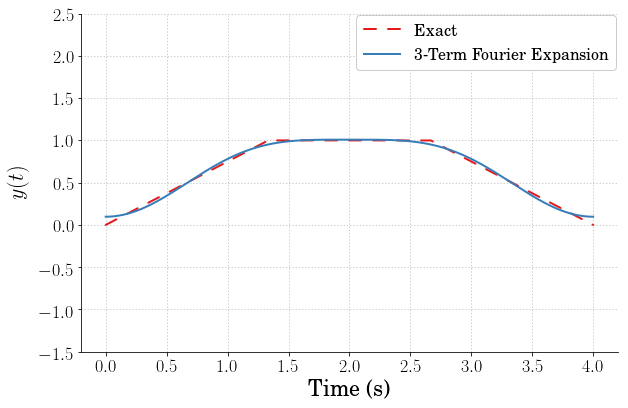

In [88]:
# Now, let's plot the comparison


# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='Serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='Serif',fontsize=18)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

plt.xlabel(r'Time (s)',family='Serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel(r'$y(t)$',family='Serif',fontsize=22,weight='bold',labelpad=10)

plt.plot(t, y, '--', linewidth=2, label=r'Exact')

f = str(num_terms) + '-Term Fourier Expansion'
plt.plot(t, approx, linewidth=2, label=f)

plt.ylim(-1.5,2.5)

leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts() 
plt.setp(ltext,family='Serif',fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# If you want to save the figure, uncomment the two commands below. 
#   The figure will be saved in the same directory as your IPython notebook.
# f = str(num_terms) + 'orderFourierApprox.pdf'
# plt.savefig(f)

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

## Response Comparison
Now, let's look at the response of a simple mass-spring-damper system like the one shown in Figure 2.
<p style="text-align:center">
	<img src="http://shared.crawlab.org/MassSpringDamper_Seismic_Horiz.png" alt="A Mass-Spring-Damper System" width=35%/></a><br>
    <strong> Figure 2: A Mass-Spring-Damper System </strong>
</p>

The equation of motion for the system is:

$ \quad m \ddot{x} + c \dot{x} + kx = c \dot{y} + ky $

We could also write this equation in terms of the damping ratio, $\zeta$, and natural frequency, $\omega_n$.

$ \quad \ddot{x} + 2\zeta\omega_n\dot{x} + \omega_n^2x = 2\zeta\omega_n \dot{y} + \omega_n^2 y$

For information on how to obtain this equation, you can see the lectures at the [class website](http://www.ucs.louisiana.edu/~jev9637/MCHE485.html).

### Control System Library
For the following simulations in this notebook, we will use the [Control Systems Library for Python](http://www.cds.caltech.edu/~murray/wiki/Control_Systems_Library_for_Python). Instructions on installation and use can be found at that link.

In [89]:
import control               # import the control system library

In [90]:
# Define the System Parameters
m = 1.0                      # kg
k = (2.0 * np.pi)**2         # N/m (Selected to give an undamped natrual frequency of 1Hz)
wn = np.sqrt(k / m)          # Natural Frequency (rad/s)

z = 0.25                     # Define a desired damping ratio
c = 2 * z * wn * m           # calculate the damping coeff. to create it (N/(m/s))

wd = wn * np.sqrt(1 - z**2)  # Damped natural frequency (rad/s)

In [91]:
# Define the system to use in simulation - in transfer function form here
num = [2.0 * z * wn , wn**2]
den = [1, 2.0 * z * wn, wn**2]

# Definte the transfer function
sys = control.tf(num, den)

# run the simulation - first with the exact input
[T_out, yout_exact, xout_exact] = control.forced_response(sys, t, y)

# run the simulation - now with the approximate input
[T_approx, yout_approx, xout_approx] = control.forced_response(sys, t, approx)

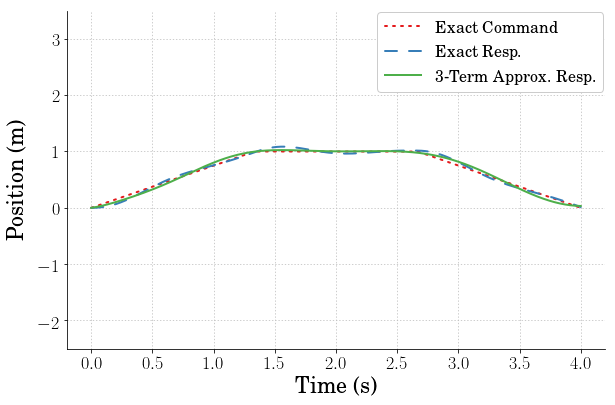

In [92]:
# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='CMU Serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='CMU Serif',fontsize=18)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

plt.xlabel('Time (s)',family='serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel('Position (m)',family='serif',fontsize=22,weight='bold',labelpad=10)

plt.plot(t,y,':',linewidth=2,label=r'Exact Command')
plt.plot(t,yout_exact,'--',linewidth=2,label=r'Exact Resp.')

f = str(num_terms) + '-Term Approx. Resp.'
plt.plot(t,yout_approx,linewidth=2,label=f)

# You may need to adjust these limits for best results
plt.ylim(-2.5, 3.5)

leg = plt.legend(loc='upper right', fancybox=True)
ltext  = leg.get_texts() 
plt.setp(ltext,family='serif',fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# If you want to save the figure, uncomment the two commands below. 
#   The figure will be saved in the same directory as your IPython notebook.
# f = str(num_terms) + 'orderFourierApprox_Resp.pdf'
# plt.savefig(f)

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

<hr style="border: 0px;
        height: 1px;
        text-align: center;
        background: #333;
        background-image: -webkit-linear-gradient(left, #ccc, #333, #ccc); 
        background-image:    -moz-linear-gradient(left, #ccc, #333, #ccc); 
        background-image:     -ms-linear-gradient(left, #ccc, #333, #ccc); 
        background-image:      -o-linear-gradient(left, #ccc, #333, #ccc);">

#### Licenses
Code is licensed under a 3-clause BSD style license. See the licenses/LICENSE.md file.

Other content is provided under a [Creative Commons Attribution-NonCommercial 4.0 International License](http://creativecommons.org/licenses/by-nc/4.0/), CC-BY-NC 4.0.

In [93]:
# This cell will just improve the styling of the notebook
from IPython.core.display import HTML
import urllib.request
response = urllib.request.urlopen("https://cl.ly/1B1y452Z1d35")
HTML(response.read().decode("utf-8"))

URLError: <urlopen error [Errno 8] nodename nor servname provided, or not known>